**EE21RESCH01010 : ANNU
CONVEX LAB 8**

A company ’ XYZ ’ is constructing a road through a hilly area. The height
of the roadbed should be chosen in such a way that the total cost of construction
is minimized. The construction cost depends on the difference between height
of the roadbed and the current elevation of the road. hi gives the height of
the roadbed at a distance di meters down the road, where d > 0 is a given
discretization. The existing elevation at a point di meters down the road is
given by ei
.
The construction cost is mainly affected by the cuts(roadbed below existing
elevation) and fills(roadbed above existing elevation) present in the road. The
cut cost φ
cut and fill cost φ

f ill are the linear functions of the difference between
the existing elevation of the road and height of the roadbed. The overall cost
(C) is a linear combination of the cut cost and fill cost.


The goal is to minimize C subject to the following constraints.
* The maximum allowable road slope( first derivative) is D(1)
.
* The maximum allowable curvature(second derivative) is D(2)
.

* The maximum allowable third derivative is D(3)
.

Formulate the optimization problem and verify the convexity of cut and fill
functions by plotting for u in range (1:0.1:10). Find the optimal grading plan
for the problem with data given in the file data.m or data.py . Plot hi
,ei and

hi − ei for the optimal grading plan and report the associated cost.

In [66]:
#Importing libraries
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

In [72]:
#Data given to us
n=100
x=np.linspace(1,101,100)
#e=np.array([5*np.sin(i/(n*3*np.pi))+np.sin(i/(n*10*np.pi)) for i in x]) #1st expression as given in pdf is used
e=np.array([5*np.sin((3*np.pi*i)/n)+np.sin((10*np.pi*i)/n) for i in x]) #We are asked to use this expression
d=np.arange(1,101,1)

D=[0.08,0.025,0.005] #Constraints gradient vector

#Cost array creation
def cost_array(u):
  uplus=cp.maximum(u,0)
  uminus=cp.maximum(-u,0)
  phi_fill=cp.square(uplus)*2+ uplus*30
  phi_cut=cp.square(uminus)*12+ uminus

  cost=phi_fill+phi_cut
  return cost


#Reshaping vectors
e=np.reshape(e,(n,1))
d=np.reshape(d,(n,1))
#CVXPY VARIABLE
h=cp.Variable((n,1))
u=h-e #diff between actual and new elevation



#OBJECTIVE FUNCTION
cost=cost_array(u)
tot_cost=cp.sum(cost)
#Minimise cost
obj=cp.Minimize(tot_cost)


#Constraints declaration
constraints=[]
#derivatives
G1=np.zeros((n,1))
G2=np.zeros((n,1))
G3=np.zeros((n,1))

#G1=h[1:n]-h[0:n-1]
#G2=G1[1:n-1]-G1[0:n-2]
#G3=G2[1:n-2]-G2[0:n-3]
G1=h[1:(h.shape[0])-1]-h[0:(h.shape[0])-2]    #Else all values are put as zero as mentioned in class by sir
G2=G1[1:(G1.shape[0])-1]-G1[0:(G1.shape[0])-2] #Else all values are put as zero as mentioned in class by sir

G3=G2[1:(G2.shape[0])-1]-G2[0:(G2.shape[0])-2] #Else all values are put as zero as mentioned in class by sir

constraints=[cp.max(cp.abs(G1))<=D[0],cp.max(cp.abs(G2))<=D[1],cp.max(cp.abs(G3))<=D[2]]


#CVXPY PROBLEM CREATION
prob=cp.Problem(obj,constraints)
try:
   prob.solve(solver=cp.ECOS)
except Exception as e:
  print(e)

#Printing values
print("optimal status:",prob.status)
#print("our minimized cost:",prob.solve(solver=cp.ECOS))
print("total minimised cost",tot_cost.value)
print("existing elevation values are:",e)
print(" new height values are",h.value)

optimal status: optimal
total minimised cost 7520.5707873283445
existing elevation values are: [[ 7.79558561e-01]
 [ 1.53193139e+00]
 [ 2.21682611e+00]
 [ 2.80784763e+00]
 [ 3.28682017e+00]
 [ 3.64523246e+00]
 [ 3.88473155e+00]
 [ 4.01661933e+00]
 [ 4.06040495e+00]
 [ 4.04156080e+00]
 [ 3.98870859e+00]
 [ 3.93051907e+00]
 [ 3.89263722e+00]
 [ 3.89494173e+00]
 [ 3.94941425e+00]
 [ 4.05883227e+00]
 [ 4.21641742e+00]
 [ 4.40647472e+00]
 [ 4.60595952e+00]
 [ 4.78681546e+00]
 [ 4.91884986e+00]
 [ 4.97285852e+00]
 [ 4.92368707e+00]
 [ 4.75292183e+00]
 [ 4.45093970e+00]
 [ 4.01811078e+00]
 [ 3.46503107e+00]
 [ 2.81175988e+00]
 [ 2.08613523e+00]
 [ 1.32133271e+00]
 [ 5.52908351e-01]
 [-1.84382245e-01]
 [-8.59674395e-01]
 [-1.44868917e+00]
 [-1.93576701e+00]
 [-2.31504063e+00]
 [-2.59063355e+00]
 [-2.77586802e+00]
 [-2.89156477e+00]
 [-2.96360790e+00]
 [-3.02002106e+00]
 [-3.08785013e+00]
 [-3.19016659e+00]
 [-3.34349331e+00]
 [-3.55591248e+00]
 [-3.82604668e+00]
 [-4.14301684e+00]
 [-4.4873827

Text(0.5, 1.0, 'height of Hill-optimised')

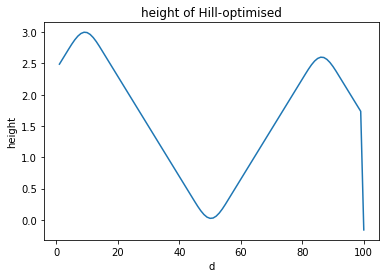

In [71]:

#Height of hill plot
plt.plot(d,h.value)
plt.xlabel("d")
plt.ylabel("height")
plt.title("height of Hill-optimised")

Text(0.5, 1.0, 'u plot-height and elevation difference')

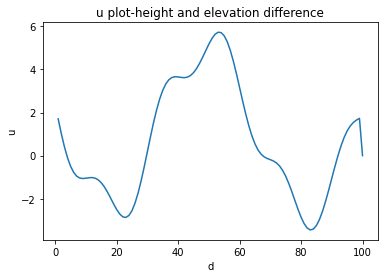

In [68]:

#u plot 
plt.plot(d,(h.value-e)) #u=h-e
plt.xlabel("d")
plt.ylabel("u")
plt.title("u plot-height and elevation difference")

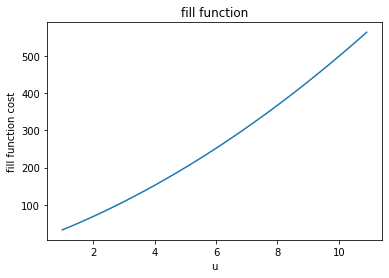

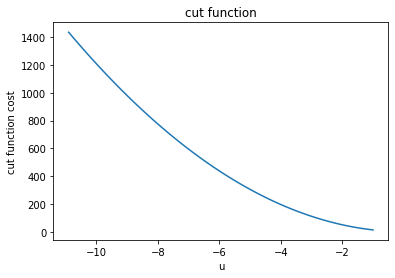

In [69]:
#fill and cut function function plot
U=np.arange(1,11,0.1)
Uplus=np.array([max(u,0) for u in U])
  
phi_fill=np.array([np.square(uplus)*2+ uplus*30 for uplus in Uplus])
phi_fill=np.reshape(phi_fill,(100,-1))
plt.figure()
plt.plot(U,phi_fill)
plt.title("fill function")
plt.ylabel("fill function cost")
plt.xlabel('u')
U=np.arange(1,11,0.1)
Uminus=np.array([max((u),0) for u in U])
phi_cut=np.array([np.square(uminus)*12+ uminus for uminus in Uminus])
plt.figure()
plt.title("cut function")
plt.ylabel("cut function cost")
plt.xlabel('u')
plt.plot((-U),phi_cut)

#CONVEXITY CAN BE SEEN FROM GRAPGH -both are convex functions ,one increasing and one decreasing

Text(0.5, 1.0, 'Elevation(existing) of Hill')

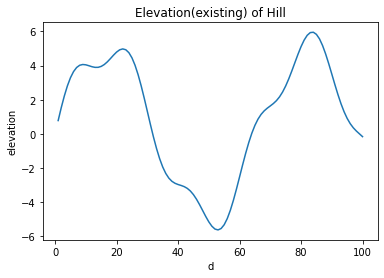

In [70]:
#Elevation with respect to distance plot
plt.plot(d,e)
plt.xlabel("d")
plt.ylabel("elevation")
plt.title("Elevation(existing) of Hill")

In [45]:
type(cost)

cvxpy.atoms.affine.add_expr.AddExpression

In [46]:
cost

Expression(CONVEX, NONNEGATIVE, (100, 1))

In [ ]:
print(type(e))

<class 'numpy.ndarray'>
